# SC207 - Social Data Science
# Exploring, structuring and visualising data with Pandas





### The Data

<img src="https://github.com/Minyall/sc207_materials/blob/master/images/RMS_Titanic_3.jpg?raw=true" align="right" width=150>

Today we will be using some datasets


In [47]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
titanic_df = sns.load_dataset('titanic')

In [83]:
# We take a look at the data as normal

titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [84]:
titanic_df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [85]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### The primary variables in the dataset

| Variable | Definition                                 | Key                                            |
|----------|--------------------------------------------|------------------------------------------------|
| survived | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

##### The seaborn variation adds additional columns such as `alone`, `alive` etc.

`.describe()` provides a very quick way to get some insights into the numerical columns in your data covering...
- Count of records
- Mean value
- Standard Deviation
- Minimum Value
- 25th / 50th / 75th percentiles
- Maximum Value

In [105]:
# .describe the dataset
titanic_df.describe()

,survived,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


### Some possible questions to ask.

- Passenger class, how many in 1st class, 2nd class and 3rd class - Categorical
- Distribtion of fares, was there really a fare of 0 or is that a mistake? - Distribution plot
- Age, what ages were the passengers? Distribution plot or categorical if we put the ages in bins.


In [106]:
titanic_df['pclass'] = titanic_df['pclass'].astype('category')
titanic_df['alive'] = titanic_df['alive'].astype('category')

In [107]:
# For the distributions we can get the raw figures using .value_counts
titanic_df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [132]:
sns.catplot?

Visualisation can give us a better sense of the difference between the numbers. Seaborns `catplot` (Categorical Plot) can be used for a basic visualisation of simple counts, or the relationship between a numerical and categorical variables.

We can use the `kind` keyword to specify that we want a count plot.

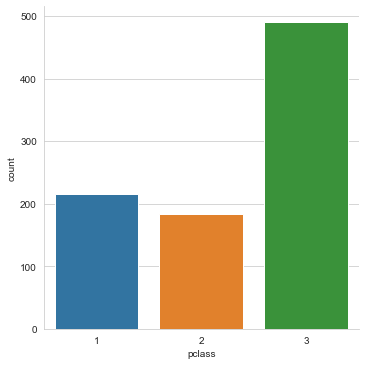

In [134]:
sns.catplot(data=titanic_df, x='pclass', kind='count')
sns.despine() # Cleans up the visual a little
plt.show()

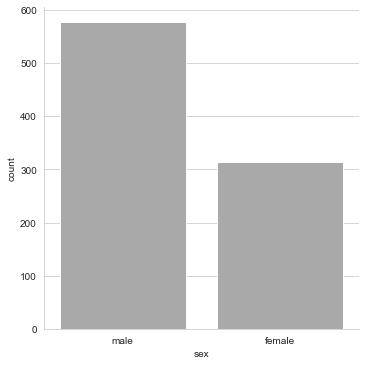

In [135]:
# we use a specific colouring here to avoid conflating the blue, orange and green classes with sex
sns.catplot(data=titanic_df, x='sex', kind='count', color='darkgrey')
sns.despine() # Cleans up the visual a little
plt.show()

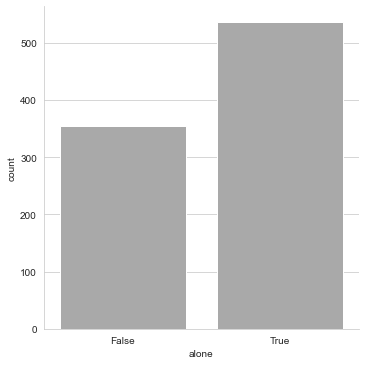

In [149]:
sns.catplot(data=titanic_df, x='alone', kind='count', color='darkgrey')
sns.despine() # Cleans up the visual a little
plt.show()

Going beyond simple counts, `Catplot` can also show us how numerical variables (such as age, fare, number of family members) relate to categorical (Class, sex, survival). Let's look at how the visualisation of age and class varies depending on the type of plot used.

First a strip plot shows us the individual passenger points against the y axis of Age. How far left or right they are within their strip is purely about visibility.

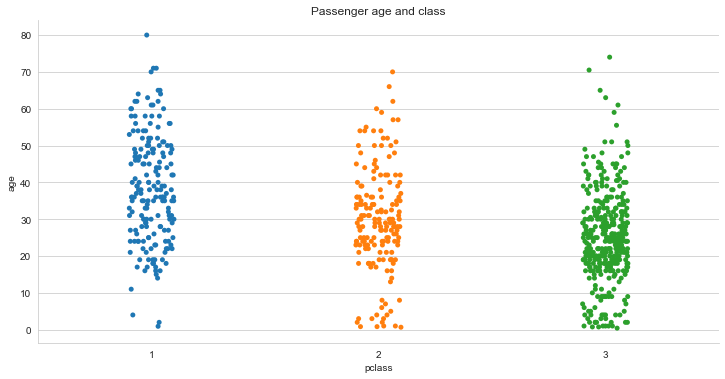

In [172]:
ax = sns.catplot(data=titanic_df, x='pclass', y='age',kind='strip', aspect=2)

ax.set(title='Passenger age and class')
sns.despine()
plt.show()

We may get the sense that in general perhaps the lower down in class, the lower your age. But the strip plot struggles to communicate the density of points, just the overall range of ages within each class.

The point plot improves on this by showing us the average age per class with an error bar, indicating the confidence interval (vertical bars) as well as the trend. By setting the hue keyword to `sex` we can generate seperate plots for male and female passengers.

##### What is a confidence interval?
Imagine taking our dataset and randomly sampling some, but not all of the passengers and then working out the average age. Depending on the sample taken sometimes the average age will be higher than than the entire dataset, sometimes lower. The bars indicate that range of differences after sampling many times, so that we can be better informed about how reliable that single point is. Where there is a lot of variation in age the error bars will be bigger.

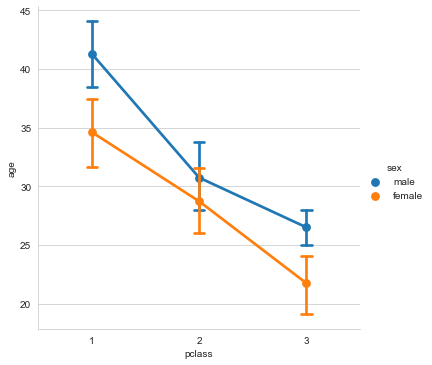

In [234]:
sns.catplot(data=titanic_df, x='pclass', y='age', kind='point', hue='sex', capsize=0.1)
sns.despine()
plt.show()

The point plot disguises the outliers from view as we know from our strip plot, our age range was from 0 to 80, yet our vertical bars aren't telling us the range of ages, but how confident we should be in that average. A box plot would help us better understand the true range of ages, whilst still informing us about the average ages.

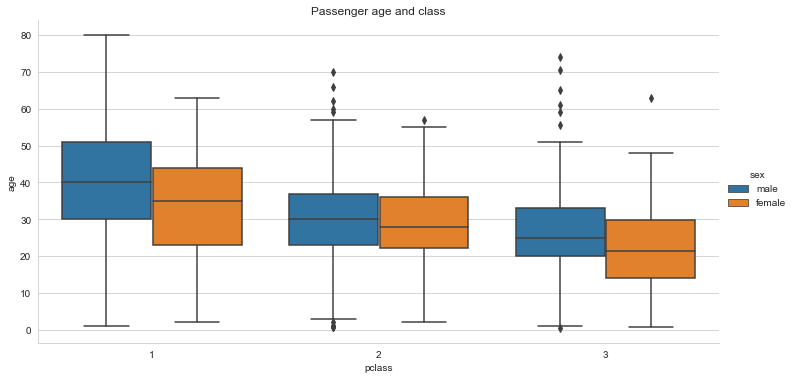

In [235]:
ax = sns.catplot(data=titanic_df, x='pclass', y='age',kind='box', hue='sex', aspect=2)

ax.set(title='Passenger age and class')
sns.despine()
plt.show()

The box plot provides us...
- The mean age - middle line of the box
- The age at the 25th percentile - bottom of the box
- The age at the 7th percentile - top of the box
- A sense of the spread - The whiskers show the range of the lowest 25% and the highest 25%.
- Outliers - Determined as individual points that are more than 1.5x higher or lower than the length of the box.

They can however be less interpretable than other categorical plots such as the Boxen plot which gives us a better sense of how many passengers fall into each range of age by plotting the whiskers too...


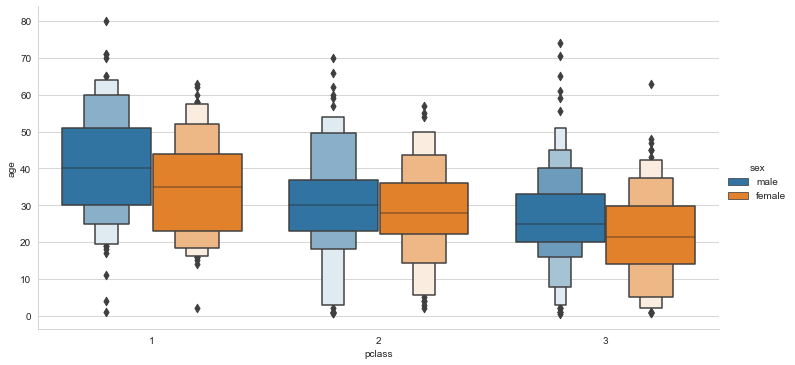

In [236]:
ax = sns.catplot(data=titanic_df, x='pclass', y='age',kind='boxen',hue='sex', aspect=2)

# ax.set(title='Passenger fare and class')
sns.despine()
plt.show()

At this point we're getting close to using a categorical plot to understand a distribution. Let's shift over to a different type of plot to better understand this.
Seaborn `displot` is for plotting distributions of values, such as histograms which will bin the values of a column into groups and then count the number of instances of that group.

In [152]:
# The ? in Jupyter allows us to query the documentation for a method
sns.displot?

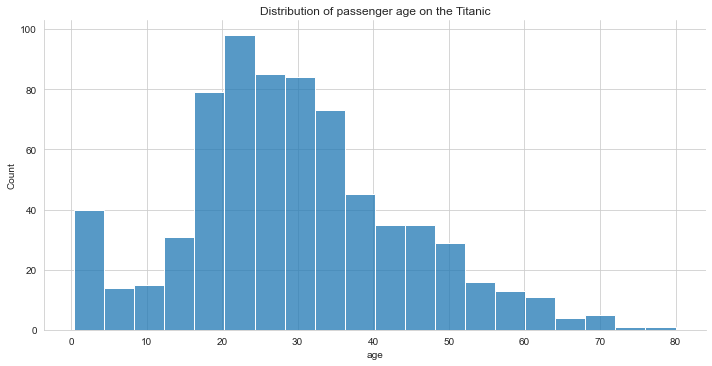

In [153]:
# We can use the height and aspect keywords to control the size of our visual
ax = sns.displot(data=titanic_df, x='age',height=5, aspect=2)

# if we assign the result of sns.displot to a variable, we can then make adjustments to it before it is finally produced.
ax.set(title='Distribution of passenger age on the Titanic')
sns.despine()
plt.show()


We can use the `hue` keyword to colour the data by class to give us a better sense of whether the average age of classes differed as well.

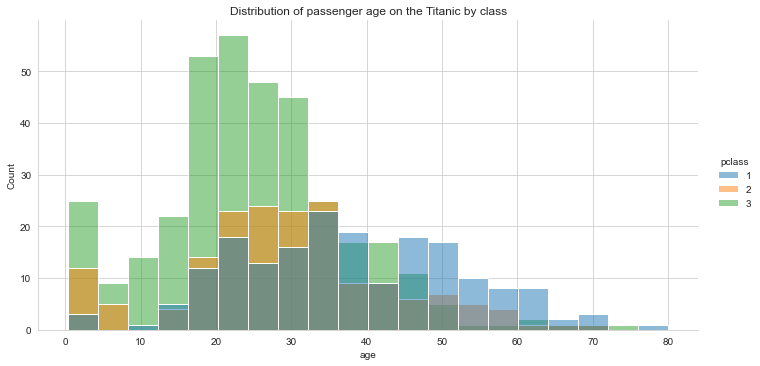

In [154]:
# pass Pclass to hue to seperate the data.
ax = sns.displot(data=titanic_df, x='age',height=5, aspect=2, hue='pclass')
ax.set(title='Distribution of passenger age on the Titanic by class')
sns.despine()
plt.show()

This helps though it is a bit unclear where the bars overlap in the middle and where the ages begin and end. let's make a few adjustments.
First we'll change the bin size to increments of 5 so each bar represents an age range of 5 years.

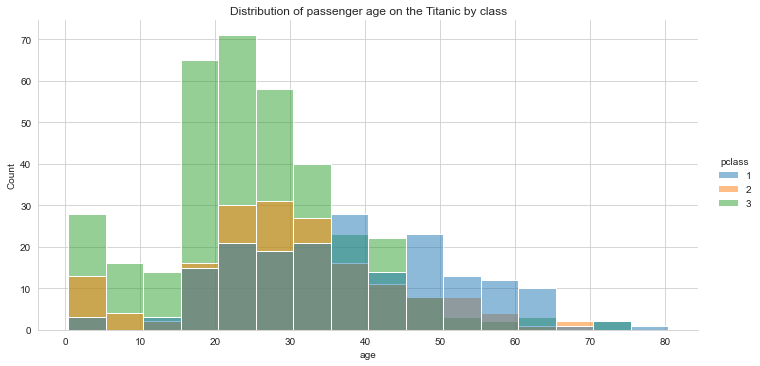

In [155]:
ax = sns.displot(data=titanic_df, x='age',height=5, aspect=2, hue='pclass', binwidth=5)

ax.set(title='Distribution of passenger age on the Titanic by class')
sns.despine()
plt.show()

It's still difficult to tell the overall difference in age distribution by class. Here is where the Kernel Density Estimate can be useful.

A Kernel density estimate indicates the probability that someone within that class will be a particular age.

We can add one to our existing visual using the keyword argument `kde=True`

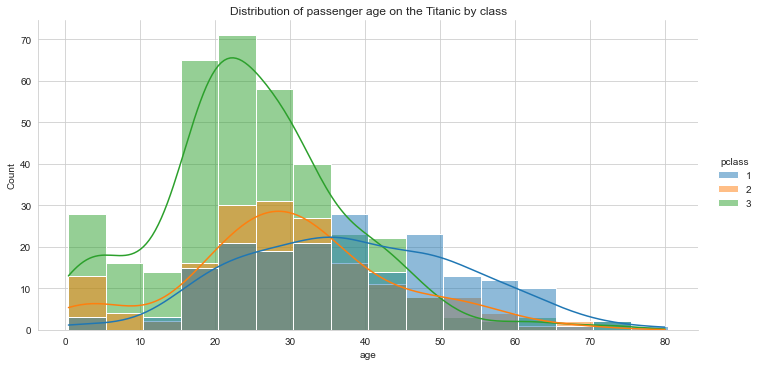

In [156]:
ax = sns.displot(data=titanic_df, x='age',height=5, aspect=2, hue='pclass', binwidth=5, kde=True)

ax.set(title='Distribution of passenger age on the Titanic by class')
sns.despine()
plt.show()

The KDE indicates to us that someone in 3rd class was much more likely to be younger, whilst those in second and first class had a much broader age range, though first class tended to be older than everyone.

In [157]:
# We can roughly check if this makes sense by looking at the mean ages of our different classes using groupby.
titanic_df.groupby('pclass')['age'].mean()

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

We could clean this up by just relying on the KDE...

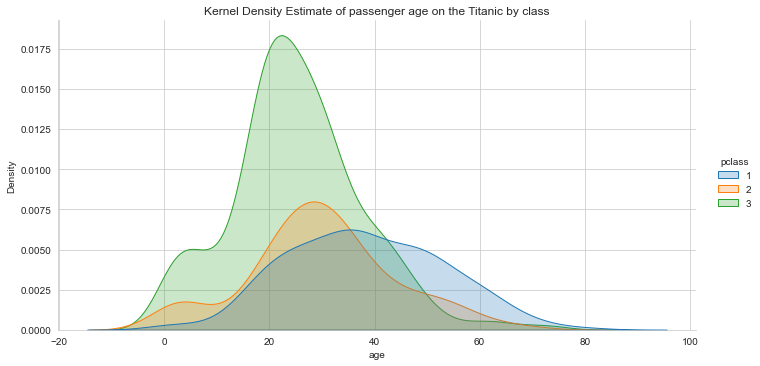

In [158]:
# Rather than add a KDE like before, we change the entire kind of distribution plot to a KDE plot, and fill the area below the lines.

ax = sns.displot(data=titanic_df, x='age',height=5, aspect=2, hue='pclass', kind='kde', fill=True)

ax.set(title='Kernel Density Estimate of passenger age on the Titanic by class')
sns.despine()
plt.show()


As we can see there are many ways in which to look at the single variable of age. Here we use a different palette to try and distinguish between the class colouring in earlier plots. You can see the different palettes available on the [Seaborn website](https://seaborn.pydata.org/tutorial/color_palettes.html)

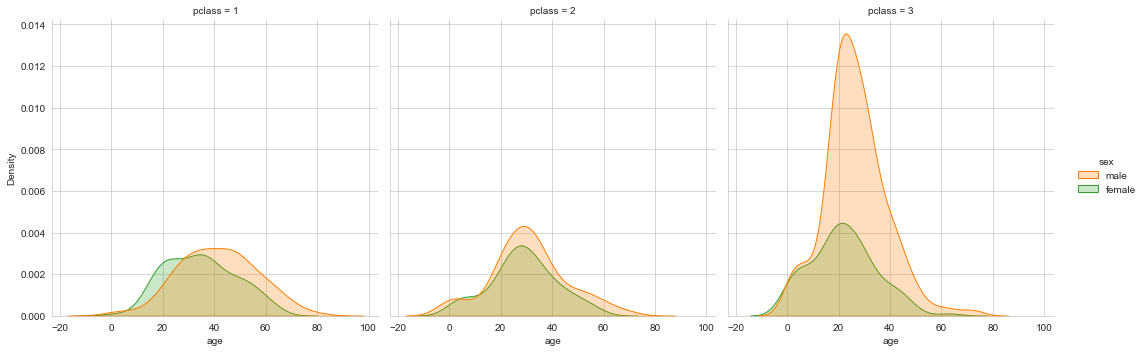

In [242]:
palette = sns.color_palette('Paired_r', n_colors=2)


ax = sns.displot(data=titanic_df, x='age',height=5, aspect=1, hue='sex', kind='kde',col='pclass', fill=True, palette=palette)

# ax.set(title='Kernel Density Estimate of passenger age on the Titanic by sex')
sns.despine()
plt.show()


Worth noting that one of the categorical plots we did not show, also uses KDE, the violin plot.

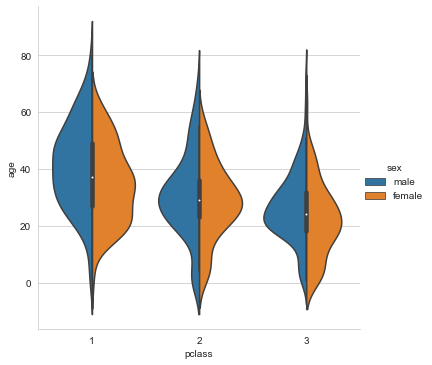

In [243]:
sns.catplot(data=titanic_df, x='pclass', y='age', hue='sex', split=True, kind='violin')
sns.despine()

## Relationships and trends

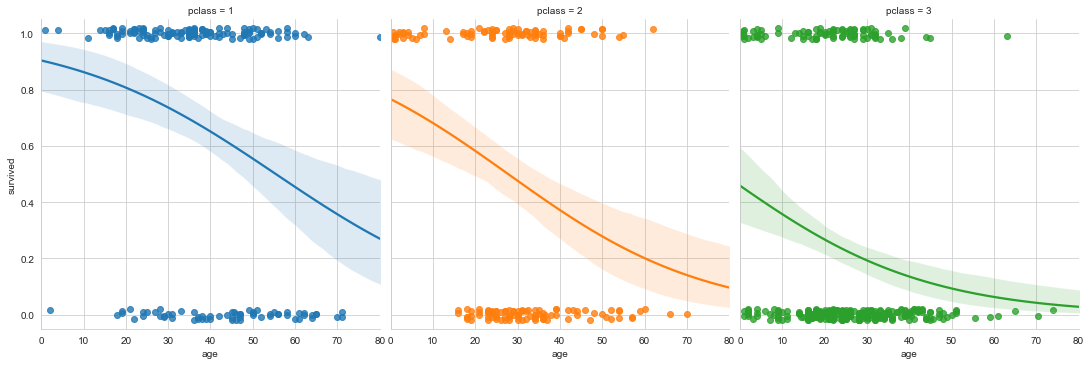

In [249]:
g = sns.lmplot(x="age", y="survived", col='pclass', hue="pclass", data=titanic_df,
               y_jitter=.02, logistic=True, truncate=False)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

In [160]:
sns.pairplot?

In [ ]:
# we can see the type for this column is object rather than float.
# this might cause problems later because it's being treated
# as a string, not a number.
df['danceability'].head()

In [ ]:
# We can do this by exchanging our current series df['danceability'] for a version of df['danceability'] that 
# has been transformed into float type data.
# We do this using the method .astype()

df['danceability'] = df['danceability'].astype(float)

In [ ]:
# Now if we check our .info() again we can see the type of the genre series has changed.
# reassigning a new series to df['genre'] is a permanent change to the dataframe
df.info()

In [ ]:
# It's also worth checking for duplicate data. Spotify provides a unique id number for every track which can be helpful in our case.
# Pandas has the .duplicated() and .drop_duplicates() methods for this very issue.

In [ ]:
# We can see if there are duplicates using .duplicated() which creates a boolean 'filter' for our data..
# We'll cover these in more detail in the next section.

dupe_filter = df.duplicated(subset=['track_id'])
df[dupe_filter]

In [ ]:
# We could even test this by manually looking for those tracks. 
# Remember when we set our index to be the track name?

# by doing our operation without assigning it to a variable we can 
# just view the result without necessarily storing it.
# chaining methods allows us to achieve this with one line. Think through each stage of the chain.
# What does each stage produce and pass on to the next method?

df.set_index('track_name').loc[#Track name here]

In [ ]:
# let's drop those duplicates. We also need to reset the index after because .drop_duplicates() will 
# remove rows leaving us with gaps in our index - e.g. 1,2,4,5,6,8,10.
# Again we can achieve this by chaining together the methods.

df = df.drop_duplicates(subset=['track_id']).reset_index(drop=True)

In [ ]:
# Lets check how much data we have left
df.info()

In [ ]:
# We might also be concerned about missing data. 
# "Speechiness" has one less value than all the other columns. This inidcates that one row has a missing value
# We can locate this by making a filter using .isna()

missing_filter = df['speechiness'].isna()
df[missing_filter]

In [ ]:
# We could replace this value with something... perhaps based on the average speechiness of the genre?
# but as it is only one record we'll just drop it from analysis using .dropna()

# dropna requires the subset (the columns we're basing our selections on, to be a list)
# we say axis = 'index' to say drop rows that have a missing value in speechiness
# if we say axis='column' it will drop the entire speechiness column if there is a single missing value!
df = df.dropna(subset=['speechiness'], axis='index')

In [ ]:
df.info()

In [ ]:
# Sometimes even if Pandas doesn't THINK there is missing data, depending on how the data was created it could still be missing.
# Whilst df.info() seems to indicate all is well there is an oddity with our 'genre' column.
# for data like our genre column we can use value counts to count the number of instances of different genres
df['genre'].value_counts()

It looks like whoever generated the data decided to put `***OOPS!***` in as a value if the genre wasn't available.
Unfortunately as that is a string like all the other genres, Pandas doesn't know any different.
In order for Pandas to understand that it is missing data, we need to replace it with a special object called a NaN.

We can get one of these NaN's using Pandas `pd.np.nan` and using the `.replace()` method replace all the `***OOPS!***` with `pd.np.nan`.

In [ ]:
df['genre'] = df['genre'].replace(to_replace='***OOPS!***', value=pd.np.nan)

In [ ]:
df.info()

In [ ]:
# lets save this dataset now it's been cleaned

df.to_csv('cleaned_spotify_top_songs.csv', index=False)

In [ ]:
# 3b. Finally drop the duplicate records, check how many records you have in your cleaned dataset, 
# and assign the value to `final_countdown`.

final_countdown = 815

assert final_countdown == titanic.shape[0]

## 3.Filtering our Data

Filtering Data allows you to select portions of your dataset based on particular conditions, such as all the tracks of a particular genre, or all tracks under a particular duration, or selecting tracks with a particular word in their name.

Filtering uses a particular syntax...

`df[filter_rule]`

We already used this when we showed all the records that had duplicates in our data...

    dupe_filter = df.duplicated(subset=['track_id'])
    df[dupe_filter]

The rule that we use within the brackets can be relatively simple or complex depending on the kinds of queries we have.



In [ ]:
# Reload our cleaned data

df = pd.read_csv('cleaned_spotify_top_songs.csv')

In [ ]:
# Lets see what a filter is doing first...

df['popularity'] > 90

# We can see that the conditional statement creates a new series that has evaluated 
# whether the statement is True or False for each row.

In [ ]:
# If we place this series inside the square brackets of a call to our df variable 
# it acts as a filter, showing only those rows that have a value of True.

pop_filter = df['popularity'] > 90 # same statement as above assigned to a variable.

high_pop = df[pop_filter]
high_pop

In [ ]:
# We can filter any way that we can create a conditional statement and we don't necessarily need to assign the filter rule to another variable first...

df[df['explicit'] == False].head()

In [ ]:
# We can combine conditional statements with...
# & (and)
# | (or) - note this is a vertical 'pipe' not an I

# Perhaps we want all explicit tracks with a popularity above 90

explicit_over_90 = (df['explicit'] == True) & (df['popularity'] > 90)

df[explicit_over_90]

In [ ]:
# We can use the | OR operator to get the very highest and very lowest in popularity

high_low = (df['popularity'] >90) | (df['popularity'] < 10)
df[high_low]

## 4. Creating New Data Combinations

Pandas allows you to quickly make new data series in your DataFrame, either by providing the values yourself, or by combining your existing data. Unlike filtering to create particular views on the data, these operations add the new data to the DataFrame stored in memory. If you want to keep the columns permanently you'll need to save the data which is covered under 'Exporting'.

In [ ]:
# First we need to create our rule and to understand this we need to understand 'Broadcasting'.

# Pandas relies on 'broadcasting', which is the ability to apply an operation to
# all values in a series or entire dataframe at the same time. Rarely is it necessary to loop over the
# rows to make changes.

In [ ]:
# A simple example would be just adding a new column with a single value...

df['source'] = 'Spotify'
df.head()

In [ ]:
# However we normally would want different values for different rows

# Say we wanted to change our 'duration' column from miliseconds to seconds to make it more meaningful to us.
# The conversion from miliseconds to seconds is to divide by 1000.

# We can do this in one line and make this a new column...

df['duration_s'] = df['duration_ms'] //1000
df.head()

In [ ]:
# Perhaps we wanted to make a new value by dividing a song's danceability by its speechiness, perhaps believing that
# the most danceable songs are non-vocal.

# We can add this to the Dataframe by assigning it a column name. 

df['pure_danciness'] = df['danceability'] / df['speechiness']
df.sort_values('pure_danciness', ascending=False).head()


In [ ]:
# Assigning it to a new variable creates a seperate independent series that isn't in the dataframe.
# Useful if you don't need the series in the DataFrame.

new_score = df['danceability'] / df['speechiness']
print(type(new_score))
new_score


In [ ]:
# Broadcasting also works with string operations....

combi_artist_genre = df['artists'] + ' - ' + df['genre']
combi_artist_genre.head()

## 4. Visualising
Pandas has a range of built in quick visualisation options, accessed through the `.plot()` method. They are built on top of another library called `matplotlib`. This is a very large library in Python which we won't cover much here, but it is key to understand the Pandas uses matplotlib, because you can tweak Pandas visuals using matplotlib commands.

However `Seaborn` is a visualisation library that has much more flexibility and is easier to use.


In [ ]:
# We'll import maptplotlib's python library here to use it to tweak our plots

import matplotlib.pyplot as plt # this is the conventional way to import matplotlib
import seaborn as sns # and this is the conventional way to import seaborn

In [ ]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

In [ ]:
# Lets investigate ages for the titanic to demonstrate basic Pandas plotting



titanic['age'].plot(kind='hist', # There are many kinds of plot we can use built into Pandas
                    title='Distribution of Ages of Passengers on the Titanic', #Allows us to set the title
                    figsize=(6,4)) # we can also adjust the size (h,v)

# we can also relabel the x-axis but we need to use matplotlib to do this
plt.xlabel('age')
# and to cleanly display the plot
plt.show()


In [ ]:
df.head()

In [ ]:
df.plot(kind='scatter',y='popularity',x='speechiness')

## Seaborn Examples
Seaborn allows us to easily split the data up by categories when visualising. Pandas can be used for this but it is much more complex.

### Scatter plot

In [ ]:
sns.scatterplot(data=titanic, x='age', y='fare')

### Scatter plot with hue

In [ ]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='alive')

### Line Plot with hue

In [ ]:
sns.lineplot(data=titanic, x='age',y='fare', hue='alive')

### Box plot with hue

In [ ]:
sns.boxenplot(data=titanic, x='Sex',y='age',hue='alive')

### Distribution plot

In [ ]:
sns.distplot(titanic['age'],kde=False)

### Swarm Plot

In [ ]:
sns.swarmplot(data=titanic, x='pclass', y='fare', hue='alive')

### Joint plot

In [ ]:
sns.jointplot(data=titanic, x='age', y='fare')

### Pairplot

In [ ]:
sns.pairplot(data=titanic, hue='alive',vars=['fare','age', 'pclass'])

## 5. Grouping Data

`.groupby()` is a convenient method of spliting up the data, applying an operation and then combining the results of the seperate operations.

Let's pose a question - Are there differences between explicit and non-explicit songs? With `.groupby()` and `.describe()` we can examine this quite quickly.

In [ ]:
# by calling `.groupby()` on our dataframe, and providing the column we want to group on,
# we create a `groupby` object.

groups = df.groupby('explicit')
groups

In [ ]:
# we'll aggregate the results by taking the .mean() of all the numerical columns
# before we can view the data we need to say how we're going to 'aggregate' or summarise the data together.

# here we take the mean or the average of the values
groups.mean()

In [ ]:
# If we would prefer the columns and the rows to be swapped, we can .transpose()

groups.mean().transpose()

In [ ]:
groups.mean().transpose().loc['popularity'].plot(kind='bar', title='Popularity')

In [ ]:
titanic.head()

In [ ]:
# You can use Groupby to group on multiple variables

titanic.groupby(['pclass','Sex']).mean()

In [ ]:
#.agg is a method that lets us specify exactly what we want each column to do
# we give it a dictionary where the key is the column name and the value is the aggregation approach.
# pandas has built in functions so we just have to provide the names as strings.

aggregation_rules = {'age':'mean','alive':'sum','fare':'mean', 'Name':'count'}

grouped_titanic = titanic.groupby(['pclass','Sex']).agg(aggregation_rules)
grouped_titanic

In [ ]:
# the result of a groupby is another Dataframe, 
# so we can carry on using it like normal
type(grouped_titanic)

In [ ]:
# lets rename the columns to make them more reflective of the new values
rename_rules = {'age':'average_age',
               'alive':'n_survivors',
               'fare': 'average_fare',
                'Name':'n_passengers'}

grouped_titanic = grouped_titanic.rename(columns=rename_rules)
grouped_titanic

In [ ]:
# lets make a new column to determine the percentage of survivors per group

grouped_titanic['pct_survivors'] = (grouped_titanic['n_survivors'] / grouped_titanic['n_passengers']) *100
grouped_titanic

In [ ]:
# a simple way to plot this would be to use pandas built in bar chart
grouped_titanic['pct_survivors'].plot(kind='bar')

In [ ]:
grouped_titanic_to_plot = grouped_titanic.reset_index() #resetting removes the 'multi-index'
grouped_titanic_to_plot

In [ ]:
sns.barplot(data=grouped_titanic_to_plot, x='pclass', y='pct_survivors', hue='Sex', dodge=True )

<a id='export'></a>
## 6 - Exporting Data
You may want to export your data, or a reshaped version of it, for use in other applications. Pandas can export to a range of data formats including CSV, Excel, Stata, HTML, JSON and others.

See: https://pandas.pydata.org/pandas-docs/stable/api.html#id12

In [ ]:
# Our grouped titanic table makes a good candidate
grouped_titanic_to_plot.head()

In [ ]:
grouped_titanic_to_plot.to_excel('our_export.xlsx')

# *Exercises*
## *Grouping and Visualising*

In this exercise we are going to explore the differences between the different playlist types in our Spotify dataset.

In [ ]:
#1.  First load your cleaned_spotify_top_songs.csv as df

df = pd.read_csv('cleaned_spotify_top_songs.csv')

In [ ]:
# 2. Using a Seaborn Pairplot (Histogram), visualise the relationships between release year
# and popularity and colour by playlist_type, for all songs released after 2000.
# Tip. You'll need to filter the df using standard pandas filtering, either beforehand or when you pass it to the pairplot


sns.pairplot(data=df[df['release_year'] >=2000], vars=['release_year','popularity'], hue='playlist_type')

In [ ]:
# 3. Now group the dataframe by 'playlist_type' and aggregate the values so that it returns the average (or mean) values for all columns
# Do this in a single line.

# Which playlist, on average, features the most popular songs?
df.groupby('playlist_type').mean()

In [ ]:
# 4 create a new table by first grouping on release_year and then use the .agg method to aggregate just the 'explicit' column using mean
# assign the new series to the variable avg_explicit_year
# tip, you'll need to reset the index to make the next step easier

avg_explicit_year = df.groupby('release_year').agg({'explicit':'mean'}).reset_index()

In [ ]:
# 4. Now using a seaborn lineplot, examine whether songs have become more explicit over time.
sns.lineplot(data=avg_explicit_year, x='release_year', y='explicit')

In [ ]:
# 5. Using broadcasting create a new boolean column where each row is True if 
# the song has a popularity greater than or equal to 90.
# name the column 'top_song'

df['top_song'] = df['popularity'] >= 90

In [ ]:
# 6. Use a boxplot to explore the relationship between three dimensions of the data, top_song, danceability, and explicit.
# Tip: x and y will provide you two dimensions, how might you add a third?

sns.boxplot(data=df, x='top_song', y='danceability', hue='explicit')

In [ ]:
# Now  group the df using 'release_year' and 'playlist_type' and aggregate using the mean
# assign the result to df_year_avg. Don't forget to reset your index

df_year_avg = df.groupby(['release_year','playlist_type']).mean().reset_index()

In [ ]:
# Finally answer these questions?

# What was the average popularity for non-explicit songs in 2019? # this can be answered using one line of code
# How does this compare all songs in our sample in or after 2010? - Demonstrate this using a visualisation. # this may need two lines

df.groupby(['release_year','explicit']).mean().loc[2019]

In [ ]:
to_plot = df.groupby(['release_year','explicit']).mean().reset_index()
sns.lineplot(data=to_plot[to_plot['release_year'] >= 2000], x='release_year', y='popularity', hue='explicit')